In [1]:
import random

In [2]:
def phi(x, r):
    return r * x * (1 - x)

In [3]:
x1 = 0

In [4]:
import time
def x2(r):
    return 1 - 1 / r

In [5]:
def d(x1, x2):
    return abs(x1 - x2)

In [6]:
eps = 1e-7

def isEnough(x_cur, x_prev):
    return d(x_cur, x_prev) < eps

In [7]:
def iterate(x0, r):
    (x_cur, x_next) = (x0, phi(x0, r))
    while (not isEnough(x_cur, x_next)):
        (x_cur, x_next) = (x_next, phi(x_next, r))
    return x_next

$x = \varphi(x)$, где $\varphi(x) = rx(1 - x), r > 0$  
$x_{1} = 0, x_{2} = 1 - \frac{1}{r}$ - корни уравнения

Для того, чтобы метод сходился к корню $x$ для какого-либо начального приближения $x^{0}$ из окрестности $x$, необходимо, чтобы в этой окрестности $|\varphi'(x)| \leq 1$

Удовлетворим неравенству в точке $x_{1} = 0$: $|\varphi'(x_{1})| \leq 1 => |r - 2rx_{1}| \leq 1 => |r| \leq 1 => r \leq 1$  
То есть, для того, чтобы у корня $x_{1}$ существовала окрестность, в которой любое начальное приближение будет сходиться к $x_{1}$, необходимо $0 < r \leq 1$, причем $r = 1$ - граничный случай, при котором $x_{1} = x_{2} = 0$. Окрестностью будет отрезок $[1 - \frac{1}{r}; \frac{1}{r}]$

In [8]:
def test1():
    tests_r = 100
    tests_x = 100
    
    (r_left, r_right) = (0.0, 0.99)
    (toX1, toX2) = (0, 0)

    for i in range(tests_r):
        r = random.uniform(r_left, r_right)
        for j in range(tests_x):
            (x_left, x_right) = (1 - 1 / r, 1 / r)
            x0 = random.uniform(x_left, x_right)
            xn = iterate(x0, r)

            (d1, d2) = (d(xn, x1), d(xn, x2(r)))

            if d1 < d2:
                toX1 += 1
            else:
                toX2 += 1
    
    return (toX1, toX2)
    


In [9]:
print(test1())

(10000, 0)


In [10]:
def points(x0, r):
    xns = []

    (x_cur, x_next) = (x0, phi(x0, r))
    
    xns.append(x_cur)    
    xns.append(x_next)
    
    while (not isEnough(x_cur, x_next)):
        (x_cur, x_next) = (x_next, phi(x_next, r))
        xns.append(x_next)
    return xns

In [11]:
import matplotlib.pyplot as plt

def showPlot(x_left, x_right, r, n = 10):
    x0 = random.uniform(x_left, x_right)
    xns = points(x0, r)
    plt.plot(xns[0:n], linewidth = 2)
    plt.show()

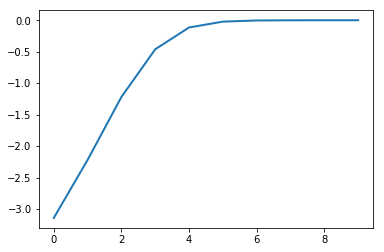

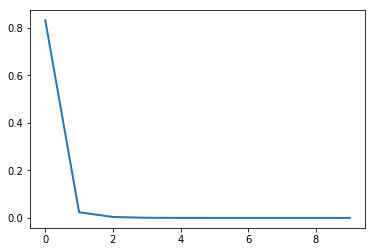

In [12]:
r = random.uniform(0.0, 0.99)
showPlot(1 - 1 / r, 0, r)
showPlot(0, 1, r)

Удовлетворим неравенству в точке $x_{2} = \frac{1}{r}$: $|\varphi'(x_{2})| \leq 1 => |r - 2rx_{2}| \leq 1 => |2 - r| \leq 1 => 1 \leq r \leq 3$  
Окрестностью будет отрезок $[0; 1]$

In [13]:
def test2():
    tests_r = 100
    tests_x = 100
    
    (r_left, r_right) = (1.0, 2.99)
    (toX1, toX2) = (0, 0)

    for i in range(tests_r):
        r = random.uniform(r_left, r_right)
        for j in range(tests_x):
            (x_left, x_right) = (0.0, 1.0)
            x0 = random.uniform(x_left, x_right)
            xn = iterate(x0, r)

            (d1, d2) = (d(xn, x1), d(xn, x2(r)))

            if d1 < d2:
                toX1 += 1
            else:
                toX2 += 1
    
    return (toX1, toX2)

In [14]:
print(test2())

(0, 10000)


Однако, при $1 \leq r \leq 3$ имеют место два вида сходимости к $x_{2}$ - монотонная и колебаьельная.  
Условие монотонной сходимости: $\varphi'(x) > 0$ на отрезке локализации корня $x_{1}$  
Условие колебательной сходимости: $\varphi'(x) < 0$ на отрезке локализации корня $x_{1}$  
Удовлетворим неравенствам в точке $x_{1} = 1 - \frac{1}{r}$:  
$2 - r > 0 => r < 2$  
$2 - r < 0 => r > 2$

То есть отрезок $[1; 3]$ разбивается на два полуинтервала:  
$[1; 2)$ - монотонная сходимость  
$(2; 3]$ - колебательная сходимость

In [15]:
def detect_type(directions):
    changes = 0
    for i in range(1, len(directions)):
        if (not (directions[i] == directions[i - 1])):
            changes += 1
    return float(changes) / len(directions) < 0.3

In [16]:
def iterate2(x0, r):
    x_exp = 1 - 1 / r
    directions = []
    
    (x_cur, x_next) = (x0, phi(x0, r))
    
    directions.append(x_cur < x_exp)
    directions.append(x_next < x_exp)
    
    while (not isEnough(x_cur, x_next)):
        (x_cur, x_next) = (x_next, phi(x_next, r))
        directions.append(x_next < x_exp)

    return detect_type(directions)

In [17]:
def test3():
    tests_r = 100
    tests_x = 100
    
    (r_left, r_right) = (1.0, 1.99)
    (mon, fluct) = (0, 0)

    for i in range(tests_r):
        r = random.uniform(r_left, r_right)
        for j in range(tests_x):
            (x_left, x_right) = (0.0, 1.0)
            x0 = random.uniform(x_left, x_right)
            t = iterate2(x0, r)

            if (t):
                mon += 1
            else:
                fluct += 1
    
    return (mon, fluct)

In [18]:
print(test3())

(10000, 0)


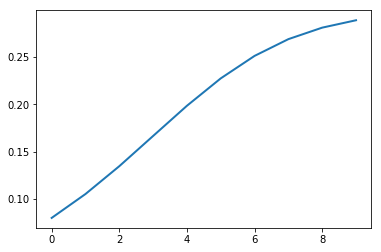

In [105]:
r = random.uniform(1.0, 1.99)
showPlot(0, 0.5, r)

In [20]:
def test4():
    tests_r = 100
    tests_x = 100
    
    (r_left, r_right) = (1.99, 2.99)
    (mon, fluct) = (0, 0)

    for i in range(tests_r):
        r = random.uniform(r_left, r_right)
        for j in range(tests_x):
            (x_left, x_right) = (0.0, 1.0)
            x0 = random.uniform(x_left, x_right)
            t = iterate2(x0, r)

            if (t):
                mon += 1
            else:
                fluct += 1
    
    return (mon, fluct)

In [21]:
print(test4())

(9, 9991)


2.9106114012306636


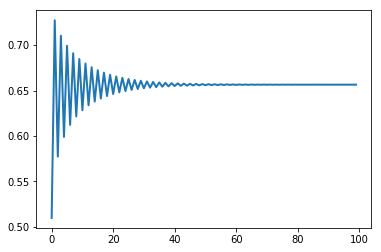

In [99]:
r = random.uniform(2.0, 2.99)
#r = 2.9106114012306636
showPlot(0.5, 0.6, r, 100)

In [23]:
def traectory(x0, r):
    xs, ys = [], []
    
    (x_cur, x_next) = (x0, phi(x0, r))
    xs.append(x_cur)
    ys.append(x_next)

    while (not isEnough(x_cur, x_next)):
        xs.append(x_next)
        ys.append(x_next)
        
        (x_cur, x_next) = (x_next, phi(x_next, r))
        
        xs.append(x_cur)
        ys.append(x_next)
        
    return (xs, ys)

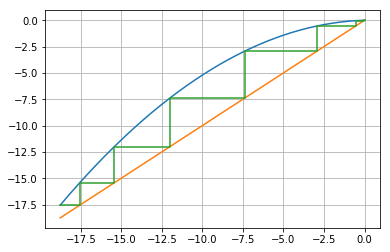

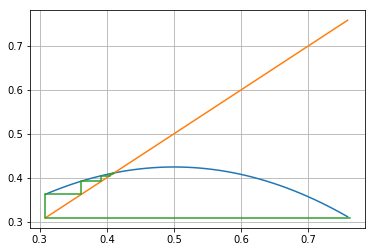

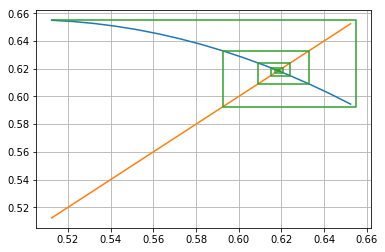

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def parabola(r, xs):
    return np.array([r * x * (1 - x) for x in xs])

def showPlot2(r, x0):
    (t_x, t_y) = traectory(x0, r) 
    
    x_l = np.min(t_x)
    x_r = np.max(t_x)
    
    x = np.arange(x_l, x_r, 0.01)
    
    yp = parabola(r, x)
    
    plt.plot(x, yp)
    plt.plot(x, x)
    plt.plot(t_x, t_y)
    plt.grid(True)
    plt.show()

r = random.uniform(0.0, 0.99)
x0 = random.uniform(1 - 1/r, max(1 - 1/r + 0.1, 0))
#r = 0.22849145787460157
#x0 = -2.3845590769850524
showPlot2(r, x0)



r = random.uniform(1.0, 1.99)
x0 = random.uniform(0, 1.0)
#r = 1.6582888881912101
#x0 = 0.9901834842541917
showPlot2(r, x0)



r = random.uniform(2.0, 2.99)
x0 = random.uniform(0.5, 0.6)
#r = 2.919179838674964
#x0 = 0.5527225589515035
showPlot2(r, x0)